In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD')

In [15]:
print(df.head())
print(df.shape)

           hour_beginning         location  Pedestrians  Towards Manhattan  \
0  04/30/2019 12:00:00 AM  Brooklyn Bridge            3                  3   
1  12/31/2019 10:00:00 PM  Brooklyn Bridge           10                  9   
2  12/31/2019 11:00:00 PM  Brooklyn Bridge            2                  0   
3  12/31/2019 09:00:00 PM  Brooklyn Bridge           12                  0   
4  04/01/2019 03:00:00 AM  Brooklyn Bridge            1                  0   

   Towards Brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  40.708164   
3                12          cloudy         42.0         0.0036  40.708164   
4                 1     clear-night         36.0         0.0000  40.708164   

        long events                              Location1  
0

In [22]:
def categorize_time(time):
    time = str(time)
    if time[12:13].isnumeric():
        hour = int(time[12:13])
    if time[13:14].isnumeric():
        hour = int(time[12:14])   
    if time[-2:] == "AM":
        if 6 <= hour < 12:
            return 'morning'
        else:
            return 'night'
    else:
        if 6 <= hour < 12:
            return 'evening'
        else:
            return 'afternoon'

In [23]:
df['time_of_day'] = df['hour_beginning'].apply(categorize_time)

In [24]:
print(df.head())
print(df.shape)

           hour_beginning         location  Pedestrians  Towards Manhattan  \
0  04/30/2019 12:00:00 AM  Brooklyn Bridge            3                  3   
1  12/31/2019 10:00:00 PM  Brooklyn Bridge           10                  9   
2  12/31/2019 11:00:00 PM  Brooklyn Bridge            2                  0   
3  12/31/2019 09:00:00 PM  Brooklyn Bridge           12                  0   
4  04/01/2019 03:00:00 AM  Brooklyn Bridge            1                  0   

   Towards Brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  40.708164   
3                12          cloudy         42.0         0.0036  40.708164   
4                 1     clear-night         36.0         0.0000  40.708164   

        long events                              Location1 tim

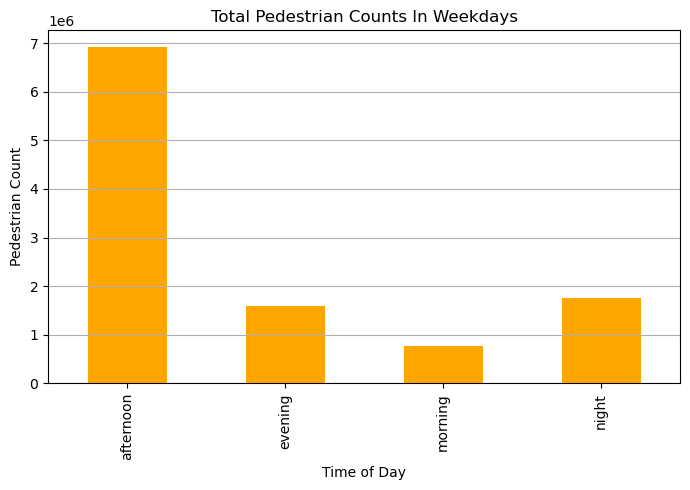

In [28]:
day_counts = df.groupby(df['time_of_day'])['Pedestrians'].sum()
plt.figure(figsize=(7, 5))
day_counts.plot(kind='bar', color='orange')
plt.title('Total Pedestrian Counts In Weekdays')
plt.xlabel('Time of Day')
plt.ylabel('Pedestrian Count')
plt.grid(axis='y')  #grid created alone y axis
plt.tight_layout()
plt.show()